## Libaries

In [1]:
print('kernel running')

kernel running


In [ ]:
# Put this into settings> adv> KB shortcut> user perf> 
# {
#   "shortcuts": [
#     {
#       "command": "notebook:hide-cell-code",
#       "keys": [
#         "C",
#         "H"
#       ],
#       "selector": ".jp-Notebook:focus"
#     },    
#     {
#       "command": "notebook:show-cell-code",
#       "keys": [
#         "C", 
#         "S"
#       ],
#       "selector": ".jp-Notebook:focus"
#     },    

#     {
#       "command": "notebook:hide-all-cell-outputs",
#       "keys": [
#         "O",
#         "H"
#       ],
#       "selector": ".jp-Notebook:focus"
#     },
      
#     {
#       "command": "notebook:show-all-cell-outputs",
#       "keys": [
#         "O"
#         "S"
#       ],
#       "selector": ".jp-Notebook:focus"
#     }

# //     {
# //       "command": "notebook:hide-all-cell-code",
# //       "keys": [
# //         "Shift O,O"
# //       ],
# //       "selector": ".jp-Notebook:focus"
# //     }
#   ]
# }

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# def square(img):
#     """
#     This function resize non square image to square one (height == width)
#     :param img: input image as numpy array
#     :return: numpy array
#     """

#     # image after making height equal to width
#     squared_image = img

#     # Get image height and width
#     h = img.shape[0]
#     w = img.shape[1]

#     # In case height superior than width
#     if h > w:
#         diff = h-w
#         if diff % 2 == 0:
#             x1 = np.zeros(shape=(h, diff//2))
#             x2 = x1
#         else:
#             x1 = np.zeros(shape=(h, diff//2))
#             x2 = np.zeros(shape=(h, (diff//2)+1))

#         squared_image = np.concatenate((x1, img, x2), axis=1)

#     # In case height inferior than width
#     if h < w:
#         diff = w-h
#         if diff % 2 == 0:
#             x1 = np.zeros(shape=(diff//2, w))
#             x2 = x1
#         else:
#             x1 = np.zeros(shape=(diff//2, w))
#             x2 = np.zeros(shape=((diff//2)+1, w))

#         squared_image = np.concatenate((x1, img, x2), axis=0)

#     return squared_image

## <p style="color:cyan;">**Threasholding**</p>
[imagesearch-threasholding](https://www.pyimagesearch.com/2014/09/08/thresholding-simple-image-segmentation-using-opencv/)

In [3]:
image_path = './mm-plate.jpg'

In [ ]:
giant_color_img = cv2.imread(image_path)

In [ ]:
h,w,c = giant_color_img.shape
print(h,w,c)

In [ ]:
giant_gray_img = cv2.cvtColor(giant_color_img, cv2.COLOR_BGR2GRAY)
print(giant_gray_img.shape)
plt.imshow(giant_gray_img)

In [ ]:
# original_image_height = image_array.shape[0]
# gray_image_height = image_array_gray.shape[0]
# original_image_height == gray_image_height

In [ ]:
A = h * w
print(h, w, A)

In [ ]:
# scale_one = 0.001
# scale_two = 0.1
# area_condition_one = A * scale_one
# area_condition_two = A * scale_two
# print(area_condition_one, area_condition_two)

### **Reading an IMAGE**

In [16]:
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV),
    ("THRESH_OTSU", cv2.THRESH_OTSU)]

In [ ]:
threshold = 127
for (threshName, threshMethod) in methods: #threshMethod is just 0 to 8 or smth
    (T, thresh_image) = cv2.threshold(src=giant_gray_img, thresh=threshold, maxval=255, type=threshMethod)
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 7.5))
    fig.tight_layout()
    axes[0].imshow(giant_gray_img)
    axes[0].set_title('Gray scaled image')

    axes[1].imshow(thresh_image)
    axes[1].set_title(threshName)
#If a pixel in the input image passes the threshold test, it will have the value set to 255. (THRESH_BINARY)
#leaves the pixel intensities as they are if the source pixel is not greater than the supplied threshold. (THRESH_TRUNC)
#cv2.THRESH_TOZERO  which sets the source pixel to zero if the source pixel is not greater than the supplied threshold

In [ ]:
giant_gray_blur = cv2.GaussianBlur(src=giant_gray_img, ksize=(5,5), sigmaX=0)
plt.imshow(giant_gray_blur)

In [ ]:
T,giant_gray_blur_thresh = cv2.threshold(src=giant_gray_blur,thresh=0, maxval=255, type=cv2.THRESH_OTSU)

In [ ]:
plt.imshow(giant_gray_blur_thresh)

In [ ]:
# T, thresh_image = cv2.threshold(src=image_array_gray ,thresh=0, maxval=255, type=cv2.THRESH_OTSU)

### **Giant image & Projections**

In [ ]:
img = cv2.imread(image_path, cv2.IMREAD_REDUCED_GRAYSCALE_8)
print(img.shape)
plt.imshow(img, cmap='gray')
print(img)

In [ ]:
#img_255 = 255 - img
#img_255 = img.copy()
img_255 = giant_gray_blur_thresh.copy()
print(img_255.shape)
plt.imshow(img_255, cmap='gray')

In [ ]:
#img_255 = 255 - img_255
print(img_255.shape)
plt.imshow(img_255, cmap='gray')

In [ ]:
proj = np.sum(img_255,1)
# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 1800
result = np.zeros((proj.shape[0],1800))
# Draw a line for each row
for row in range(img_255.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

In [ ]:
print(proj.shape)
print(proj)

In [ ]:
result.shape

In [ ]:
plt.imshow(result[119:305], cmap='gray')

In [ ]:
plt.imshow(img_255[119:305], cmap='gray')

In [ ]:
# plt.hist(image_array.ravel(),256,[0,256])
# plt.show()
# plt.hist(image_array_gray.ravel(),256,[0,256])
# plt.show()
# # plt.hist(thresh_image.ravel(),256,[0,256])
# # plt.show()
# plt.hist(blur.ravel(),256,[0,256])
# plt.show()
# # plt.hist(thresh_image_blured.ravel(),256,[0,256])
# # plt.show()

<hr style="color:blue;">

## Horizontal and Vertical PROJECTION

### **TEST-I**

In [ ]:
img = cv2.imread(image_path, cv2.IMREAD_REDUCED_GRAYSCALE_4)
print(img.shape)

In [ ]:
T,img_thes = cv2.threshold(src=cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0),thresh=0, maxval=255, type=cv2.THRESH_OTSU)
plt.imshow(img_thes, cmap='gray')

In [ ]:
proj = np.sum(img_thes,1)
# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],w))
# Draw a line for each row
for row in range(img_thes.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

In [ ]:
plt.imshow(result[26:75], cmap='gray')

In [ ]:
plt.imshow(img_thes[26:75], cmap='gray')

### **TEST-II**

(191, 418)


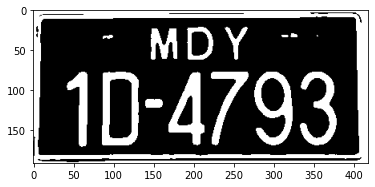

In [3]:
img = cv2.imread('plate-2.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_8)
T,img_thres = cv2.threshold(src=cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0),thresh=0, maxval=255, type=cv2.THRESH_OTSU)
plt.imshow(img_thres, cmap='gray')
print(img_thres.shape)

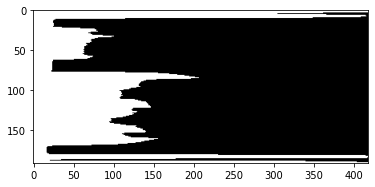

In [4]:
proj = np.sum(img_thres,1)
m = np.max(proj)
h, w = img_thres.shape
result = np.zeros((h,w))
for row in range(h):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

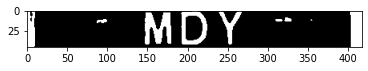

In [5]:
# print(np.average(proj[16:]))
# print(np.amax(proj[16:]))
plt.imshow(img_thres[20:65], cmap='gray')

two ways - 

1 . we can extract information to trim our detected image from `proj`

2 . we can also trim thres_img from `result` variable

#### tryin' to get meaingful indices from `proj` variable, would be faster than `result` IMHO

[106590 106590 106590  92055  77520  93075 105570 105825 104040  88740
  29070   6885   6375   6120   6120   6120   6375   6375   6375   6375
   6120   8925  14790  19380  19890  19890  20400  18105  17340  18105
  18615  21930  25500  24735  20400  19380  18360  18105  18360  18360
  17850  16575  16830  17085  16575  16065  16065  16065  16065  15810
  16065  15810  16065  16065  15555  16065  17085  18870  18615  17850
  17085  12750   6120   6120   5865   5865   5865   5865   5865   5865
   5865   5865   5865   5865   5865   5610   5610  29070  39525  43095
  45645  47940  49470  51255  52530  49980  39015  35700  34935  34170
  33915  33660  33405  33405  33405  33915  32640  30855  30345  28560
  27285  27795  27795  28050  28050  27795  28305  27795  27540  27285
  27540  32130  33150  34170  35700  35955  36210  36465  36465  36975
  37230  37230  31620  31365  31110  31365  32895  32640  31365  31875
  31365  30345  29325  28305  26265  24480  24735  24480  24735  23970
  2422

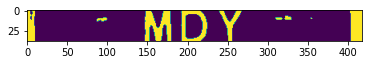

In [6]:
print(proj)
print(len(proj))
print(np.mean(proj))
print(proj[22])
print(img_thres[22])
plt.imshow(img_thres[22:60,:])

### **Binarization & H/V Projections**

In [7]:
img_bin = img_thres.copy() / 255
print(img_bin[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

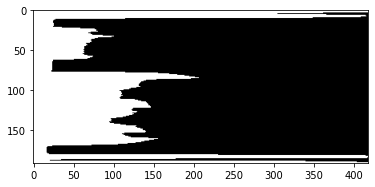

In [8]:
proj = np.sum(img_bin, 1)
m = np.max(proj)
h, w = img_bin.shape
result = np.zeros((h,w))
for row in range(h):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

[ 76.  78.  78.  80.  71.  68.  71.  73.  86. 100.  97.  80.  76.  72.
  71.  72.  72.  70.  65.  66.  67.  65.  63.  63.  63.  63.  62.  63.
  62.  63.  63.  61.  63.  67.  74.  73.  70.]


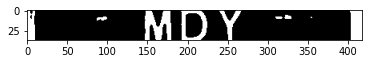

In [9]:
#print(proj)
#print(len(proj))
#print(np.mean(proj))
print(proj[23:60]) # MDY projection
#print(img_bin[22])
plt.imshow(img_thres[23:60,:], cmap='gray') #eg: projection 76 means image has 76 , 1.

In [10]:
print(proj)
print(proj.shape)

[418. 418. 418. 361. 304. 365. 414. 415. 408. 348. 114.  27.  25.  24.
  24.  24.  25.  25.  25.  25.  24.  35.  58.  76.  78.  78.  80.  71.
  68.  71.  73.  86. 100.  97.  80.  76.  72.  71.  72.  72.  70.  65.
  66.  67.  65.  63.  63.  63.  63.  62.  63.  62.  63.  63.  61.  63.
  67.  74.  73.  70.  67.  50.  24.  24.  23.  23.  23.  23.  23.  23.
  23.  23.  23.  23.  23.  22.  22. 114. 155. 169. 179. 188. 194. 201.
 206. 196. 153. 140. 137. 134. 133. 132. 131. 131. 131. 133. 128. 121.
 119. 112. 107. 109. 109. 110. 110. 109. 111. 109. 108. 107. 108. 126.
 130. 134. 140. 141. 142. 143. 143. 145. 146. 146. 124. 123. 122. 123.
 129. 128. 123. 125. 123. 119. 115. 111. 103.  96.  97.  96.  97.  94.
  95. 100. 108. 115. 128. 127. 129. 133. 136. 136. 139. 140. 139. 113.
 110. 112. 114. 118. 121. 143. 155. 150. 144. 138. 134. 127. 117. 105.
  72.  23.  17.  16.  16.  16.  16.  16.  16.  16.  17.  19. 230. 414.
 418. 418. 416. 177.  34.  20. 339. 403. 418.]
(191,)


In [11]:
all_white = np.where(proj == 418) #418 is image width, bcz if the image at specific row has all white value , it will be same with image width. not efficient tho

In [10]:
some_white = np.isclose(a=proj, b=w, atol=170) #atol is tolerence with b

In [12]:
some_white.shape

(191,)

In [22]:
# np.isclose(a=proj, b=418, atol=170).all()
# np.isclose(a=proj, b=418, atol=170).any()

In [13]:
#axis 0, viewing from verticle 
up_down_trimed = img_thres.copy()
constrain = 20

for i in some_white[:constrain]:
    if i:
        up_down_trimed = np.delete(arr=up_down_trimed, obj=0, axis=0)

for i in some_white[:-constrain]:
    if i:
        up_down_trimed = np.delete(arr=up_down_trimed, obj=-1, axis=0)

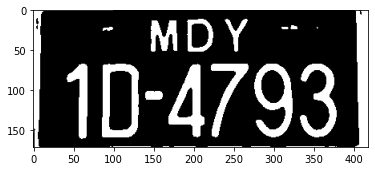

In [14]:
plt.imshow(up_down_trimed,cmap='gray')

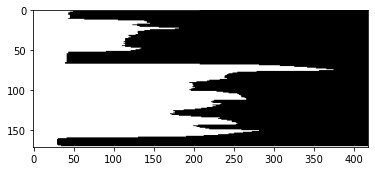

In [102]:
up_down_trimed_bin = up_down_trimed.copy() / 255
proj = np.sum(up_down_trimed_bin, 1)
m = np.max(proj)
h, w = up_down_trimed_bin.shape
result = np.zeros((h,w))
for row in range(h):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

> TODO or TOBEDO
 +  detected plate   (DONE)
 +  perspective view (Katsura)
 +  is gray scaled   (laxz)
 +  is binarized     (laxz)
 +  thresholding     (laxz)
    + blur
    + thres
 +  verticle projection (laxz)
 +  horizontal proj..   (laxz)
 +  cropped             
    +  trim two part
 +  segmentations
 +  RECO

In [99]:
# w = np.array([True, False, True, False, False])
# for i in w:
#     print(i) if i else print('Tobotobe')

In [45]:
counts = np.bincount(proj.astype(int))
counts.argmax()

## 

In [22]:
img = cv2.imread('plate-2.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_8)

(191, 418)


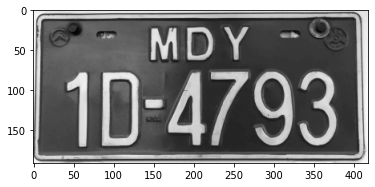

In [23]:
plt.imshow(img, cmap='gray')
print(img.shape)

In [24]:
blur  = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)

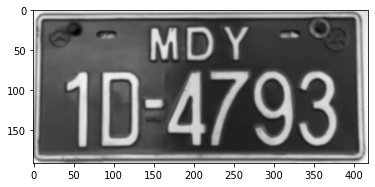

In [25]:
plt.imshow(blur, cmap='gray')

In [26]:
T, thres = cv2.threshold(src=blur, thresh=0, maxval=255, type=cv2.THRESH_OTSU)

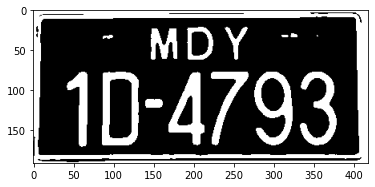

In [27]:
plt.imshow(thres, cmap='gray')

In [28]:
# T,imgThres = cv2.threshold(src=cv2.GaussianBlur(src=cv2.imread('plate-2.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_8), ksize=(5,5), sigmaX=0),thresh=0, maxval=255, type=cv2.THRESH_OTSU)

In [29]:
# plt.imshow(imgThres)

In [30]:
print(np.amax(thres))
print(np.amin(thres))

255
0


In [32]:
thres.shape

(191, 418)

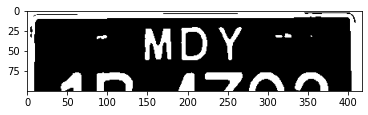

In [34]:
plt.imshow(thres[0:100, : ], cmap='gray')

In [39]:
print(thres[100:101, :])

[[255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
  255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
  255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

(191, 418)


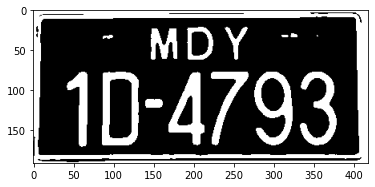

In [38]:
T,imgThres = cv2.threshold(src=cv2.GaussianBlur(src=cv2.imread('plate-2.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_8), ksize=(5,5), sigmaX=0),thresh=0, maxval=255, type=cv2.THRESH_OTSU)
imgBin = imgThres/255
plt.imshow(imgBin, cmap='gray')
print(imgBin.shape)

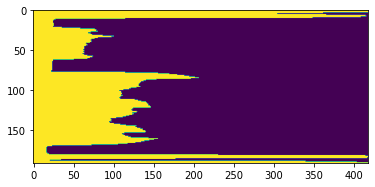

In [44]:
# Projection
proj = np.sum(imgBin,1)
m = np.max(proj)
h, w = imgThres.shape
result = np.zeros((h,w))
for row in range(h):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)
plt.imshow(result)

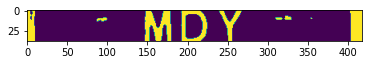

In [60]:
plt.imshow(thres[22:60, :])

In [69]:
cv2.THRESH_BINARY

0

In [70]:
cv2.THRESH_OTSU

8

In [54]:
proj[63]

24.0

In [10]:
# so 63 is 1/3 of image and check it with projection sum from vertical axis, at that 63 index, value is 24
# if it is smaller than something, what is something? let's find out
# naive approch 1
print(np.amin(proj))
# so minimum is 16 , diff is 8

# what about maximum occurrence ? 
print(np.bincount(proj.astype(int)).argmax())
# diff is 1

# what about tolerence
tolerence = np.isclose(a=proj, b=23, atol=4) #atol is tolerence with b
print(tolerence)

16.0
23
[False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False 

In [12]:
#un = zip(tolerence)

In [38]:
print(proj)
max_occur = np.bincount(proj.astype(int)).argmax()
print('it is black. good to go!') if int(proj[np.int(191 / 3)]) >= max_occur  else print('dangerous.')

[418. 418. 418. 361. 304. 365. 414. 415. 408. 348. 114.  27.  25.  24.
  24.  24.  25.  25.  25.  25.  24.  35.  58.  76.  78.  78.  80.  71.
  68.  71.  73.  86. 100.  97.  80.  76.  72.  71.  72.  72.  70.  65.
  66.  67.  65.  63.  63.  63.  63.  62.  63.  62.  63.  63.  61.  63.
  67.  74.  73.  70.  67.  50.  24.  24.  23.  23.  23.  23.  23.  23.
  23.  23.  23.  23.  23.  22.  22. 114. 155. 169. 179. 188. 194. 201.
 206. 196. 153. 140. 137. 134. 133. 132. 131. 131. 131. 133. 128. 121.
 119. 112. 107. 109. 109. 110. 110. 109. 111. 109. 108. 107. 108. 126.
 130. 134. 140. 141. 142. 143. 143. 145. 146. 146. 124. 123. 122. 123.
 129. 128. 123. 125. 123. 119. 115. 111. 103.  96.  97.  96.  97.  94.
  95. 100. 108. 115. 128. 127. 129. 133. 136. 136. 139. 140. 139. 113.
 110. 112. 114. 118. 121. 143. 155. 150. 144. 138. 134. 127. 117. 105.
  72.  23.  17.  16.  16.  16.  16.  16.  16.  16.  17.  19. 230. 414.
 418. 418. 416. 177.  34.  20. 339. 403. 418.]
it is black. good to go!


In [19]:
# max_occur = np.bincount(proj.astype(int)).argmax()
# print('it is black. good to go!') if int(proj[np.int(191 / 3)]) >=  else print('dagerous.')

23


In [39]:
s = np.random.uniform(20,23,30)
print(s)

[21.0098883  20.22123004 22.31049068 21.67097519 20.83388742 22.89766625
 20.21931731 22.21457303 20.40807894 21.79353516 21.50621255 21.56203907
 20.80691119 22.52913366 22.49286425 21.45356367 22.25742895 22.7805965
 22.42561801 22.99660544 22.41382056 21.15809424 21.46886518 21.93310719
 22.98620942 22.8351368  21.26401597 21.47458923 22.64213469 22.87508002]


In [41]:
s = np.random.normal(23,23,30)
print(s)

[ 96.94190451 -26.19095272  -0.85240403  62.37661174  19.14373897
  28.88950014  -6.94971426  28.06108019  68.79430792  13.26086331
  52.77897179  61.78758958  15.04802019  80.04253157  28.33342395
  -0.1926952   38.44128562  27.37245141  44.56785245  38.65343117
  53.43742766   6.92220705   5.1908197   63.65109776  21.18451055
  -7.72496912  54.63838473  31.2313957   49.60269164  54.88664958]


In [34]:
np.random.normal(3,0.5,3)

array([2.89034135, 2.97771785, 3.26865012])

In [61]:
int(3.4)

3

In [63]:
np.int(3.4)

3

In [66]:
import math as m

In [67]:
np.mean(proj)

118.86910994764398

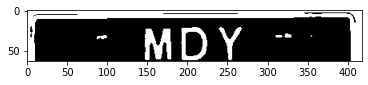

In [28]:
plt.imshow(imgBin[:63,:], cmap='gray')

### `result` variable

In [ ]:
print(result[105])

In [ ]:
i = result[3]

In [ ]:
k = np.array([255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255.])

In [ ]:
k.shape

In [ ]:
np.equal(i[:200], k).all()

<hr>

**END**

## **Contours**

In [ ]:
contours, hierarchy = cv2.findContours(thresh_image_blured, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for i in range(5):
    print(contours[i][0])
    print(contours[i][1])
    print(contours[i])

In [ ]:
print('length',str(len(contours)))
print('type', str(type(contours)))
print('length at 3 is ', str(len(contours[2])))
print('-',contours[2][1][0][1])
print('--', contours[2][4])
print(contours[2])

In [ ]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [ ]:
print('length at 0 is ', str(len(contours[0])))
for i in range(len(contours[0])):
    if i == 567:
        print(contours[0][i])

In [ ]:
img = cv2.imread(image_path)
sq = list()
nsq = list()
cropped = list()
for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    if (w * h > area_condition_one and w * h < area_condition_two and w/h > 0.3 and h/w > 0.3):
        #cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)
        c = thresh_image_blured[y:y+h,x:x+w]
        c = np.array(c)
        c = cv2.bitwise_not(c)
        nsq.append(c)
        c = square(c)
        sq.append(c)
        c = cv2.resize(c,(28,28), interpolation = cv2.INTER_AREA)
        cropped.append(c)
        plt.imshow(img)
        #cv2.imwrite('detection.png', img)
    #return cropped
    #test = cv2.rectangle(image_array_test, (x,y), (x+w,y+h), (255, 0, 0), 2)
    #test= cv2.drawContours(image_array, [cnt], 0, (0, 255, 0), 3)

In [ ]:
type(sq[0])

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=len(nsq)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(nsq)-1):
    axes[i].imshow(nsq[i])

In [ ]:
plt.imshow(nsq[4], cmap='gray')

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=len(sq)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(sq)-1):
    axes[i].imshow(sq[i])

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=len(cropped)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(cropped)-1):
    axes[i].imshow(cropped[i])

In [ ]:
plt.imshow(cropped[4], cmap='gray')

In [ ]:
len(cropped)

In [ ]:
(x,y,w,h) = cv2.boundingRect(contours[0])

In [ ]:
print(x,y,w,h)

In [ ]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    print(x,y,w,h)

In [ ]:
cv2.contourArea?